*Questão 01 item b*

Importando as bibliotecas necessárias

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pegando os dados e separando uma cópia para trabalho

In [108]:
data = np.genfromtxt("./artificial1d.csv", delimiter=",")
#separando os dados de work
work = data.copy()

Definindo as funções de normalização e normalizando os dados

In [109]:
def minMax(data):
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    
    denom = max_vals - min_vals
    denom[denom == 0] = 1

    return (data - min_vals) / denom

def standard(data):
    means = data.mean(0)
    stds = np.sqrt((np.sum((data - means)**2,axis=0))/(data.shape[0] - 1))
    return [means, stds, (data - means)/stds]

def standardRev(data, means, stds): #função inversa da normalização standard
    return data*stds + means

#separando as features e os valores desejados
X = work[:,[0]] 
Y = work[:,[1]]
X = minMax(X) #normalizando os dados de teste
[means, stds, Y] = standard(Y)

Otimizando os pesos por GD

In [110]:
EPOCHS = 100 #número de iterações do algoritmo
ALPHA = 1 #metaparâmetro passo de aprendizado

X = np.concatenate((np.ones((X.shape[0],1)), X), 1)#Concatenando uma coluna de 1 ao X
W = np.ones((2,1)) #inicializando o vetor de pesos como 1

MSE = np.ones((EPOCHS,1)) #inicializando o vetor de erros para plotar depois

for i in range(1, EPOCHS+1):
    Y_pred = X @ W
    error = Y - Y_pred
    MSE[i-1] = np.mean(error**2) #guardando o MSE
    W = W + ALPHA * (X.T @ error) * (1/X.shape[0]) #atualizando os pesos

Plotando o gráfico do erro (curva de aprendizagem)

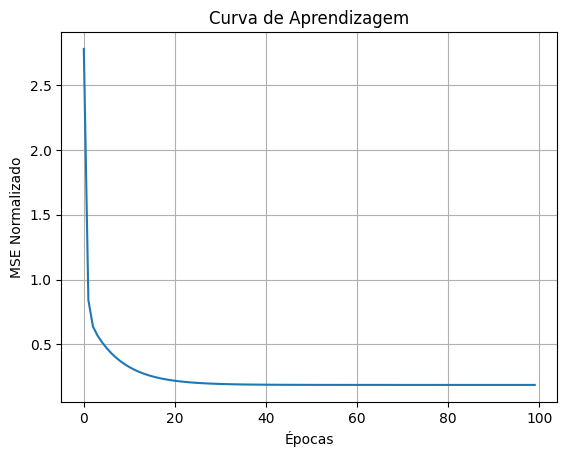

In [111]:
plt.plot(MSE)
plt.xlabel("Épocas")
plt.ylabel("MSE Normalizado")
plt.title("Curva de Aprendizagem")
plt.grid(True)
plt.show()

Desnormalizando os targets e plotando o gráfico dos dados

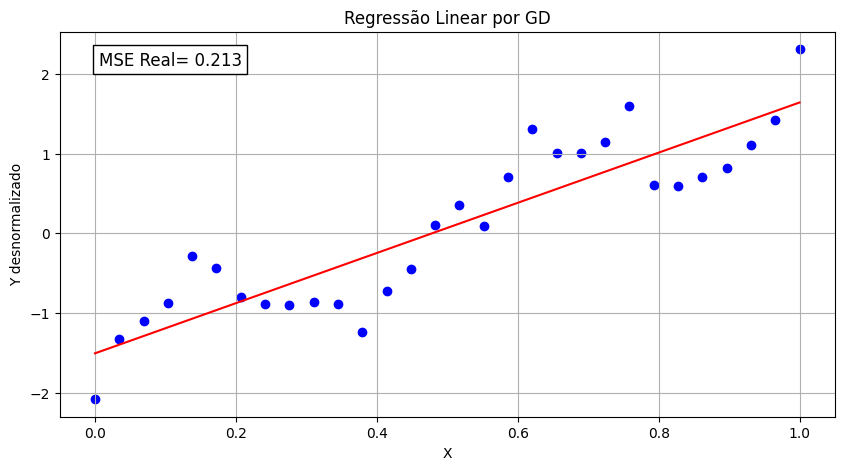

In [ ]:
#desnormalizando para mostrar o erro na escala real
Y = standardRev(Y, means, stds)
Y_pred = standardRev(Y_pred, means, stds)
mse = np.mean((Y - Y_pred)**2)

# Plotando
plt.figure(figsize=(10, 5))
plt.scatter(X[:,1], Y, color='blue', label='Dados de treino')
plt.plot(X[:,1], Y_pred, color='red', label='Regressão linear (GD)')
plt.xlabel("X")
plt.ylabel("Y desnormalizado")
plt.title("Regressão Linear por GD")
plt.text(0.05, 0.95, f"MSE Real= {mse:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()